## Single File Exploration and Analysis

We'll start by looking at a single file using the HTRC FeatureReader. This will give us an opportunity to explore the feature reader API on a smaller dataset before moving on to analysis of larger collections.

Note: For this workshop, we're using a collection of documents from UCSF Health Sciences. This workshop is adapted from tutorial material and documentation from HathiTrust and Programming Historian. If you'd like to follow along with this workbook but don't have the UCSF dataset, you can (with some modifications) use sample datasets from HathiTrust. Links are below.

Programming Historian Tutorial:
    https://programminghistorian.org/en/lessons/text-mining-with-extracted-features
    
Sample Data:
    https://analytics.hathitrust.org/datasets

        
HathiTrust FeatureReader documentation and examples
    https://github.com/htrc/htrc-feature-reader
    
The Feature Reader provides an extensive set of NLP tools for text analysis, more than we can cover in this workshop. The goal here is to introduce you to this API and do enough programming with the FeatureReader that you feel familiar enough to continue reading, coding, and applying it to your research and projects

### Import modules and set python and notebook parameters

First, some setup...

In [1]:
from htrc_features import FeatureReader, Volume

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas
pandas.set_option('display.max_rows', 50)

### Read in a single, multi-page volume

We'll use the Volume interface to read in a single document. 

In [2]:
vol = Volume('data/uc1/30268/uc1.32106020265887.json.bz2')

In [3]:
print(vol)

<Volume: University bulletin : a weekly... (1972) by University of California (System)>


Jupyter Notebook will provide some formatting and create links to this document. 

In [4]:
vol

You can also access individual attributes using Python

In [5]:
print(vol.handle_url)
print(vol.id, vol.page_count, vol.year, vol.language, vol.handle_url)

http://hdl.handle.net/2027/uc1.32106020265887
uc1.32106020265887 136 1972 eng http://hdl.handle.net/2027/uc1.32106020265887


To get a list of all attributes available on a Volume

vol.parser.meta.keys()

### Exercise

Take a look at and familiarize yourself with the article. Think about how text could be extracted from it. What information, in addition to text, would you want to preserve for your research? What information loss might you experience if you rely purely on text extraction? 

### The Volume interface

In this next section, we'll take a short tour of the Volume interface. The API is more extensive than this, so you're encouraged to keep exploring after this workshop!

### Tokens

The concept of a token is key to using the Volume API. 

"A token is an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing."

https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html

### Token Counts

We can use tokens_per_page() to count and visualize the number of tokens per page

vol.tokens_per_page()

<AxesSubplot:xlabel='page'>

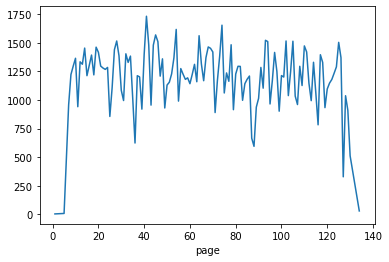

In [6]:
# %matplotlib inline
tokens = vol.tokens_per_page()
tokens.plot()

### Unique Tokens

To get unique tokens for a document

In [7]:
unique_tokens = vol.tokens()

# convert to a list to display only the first 10
list(unique_tokens)[:10]

['1',
 'Taft',
 'size',
 'MARKEY',
 'Trail',
 'Deans',
 'Geological',
 'unallocated',
 'Plans',
 'settlement']

### Token List

The Extracted Features dataset also provides token counts with much more granularity (page, section, token, part of speect, and count for each token)

Parts of speech use Penn tree banking:
    
https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [8]:
vol.tokenlist()

count
page section token                         pos       
1    body    -                             UNK      1
             020265887                     UNK      1
             3.2106                        UNK      1
             universit-of-ca-For-Santa-cau UNK      1
             |||||||                       UNK      1
...                                               ...
134  body    last                          JJ       1
             on                            IN       1
             stamped                       VBD      1
             the                           DT       1
             º                             NN       2

[63417 rows x 1 columns]

In [9]:
tl = vol.tokenlist()

In [10]:
tl

count
page section token                         pos       
1    body    -                             UNK      1
             020265887                     UNK      1
             3.2106                        UNK      1
             universit-of-ca-For-Santa-cau UNK      1
             |||||||                       UNK      1
...                                               ...
134  body    last                          JJ       1
             on                            IN       1
             stamped                       VBD      1
             the                           DT       1
             º                             NN       2

[63417 rows x 1 columns]

In [11]:
# use a groupby to count the number of each part of speech
tl.groupby(level=["pos"]).sum()[:10]

,count
pos,
#,8
$,385
'',874
",",11064
-LRB-,702
-RRB-,763
.,5533
:,4209
CC,4615


### Page and Parameters

You can access tokens for a specific page, and specify certain parameters (ignore case, select for specific part of speech or section of the document)

In [12]:
vol.tokenlist(page_select=9,case=False)

count
page section lowercase pos        
9    body    $         $         1
             ''        ''        4
             'd        MD        1
             'll       MD        1
             's        POS       7
...                            ...
             years     NNS       5
             you       PRP      12
             young     NNP       2
             your      PRP$      9
             yourself  PRP       2

[568 rows x 1 columns]

### Exercise

Try out a few other methods available on a Volume. You can go to the API or try out the list below...

In [13]:
vol.line_counts()
#vol.sentence_counts()
#vol.empty_line_counts()
#vol.begin_line_chars()
#vol.end_line_chars()

page
1        4
5        2
7      151
8      194
9      198
      ... 
127     68
128    118
129    105
130     84
134      7
Name: lineCount, Length: 127, dtype: int64

<AxesSubplot:xlabel='page'>

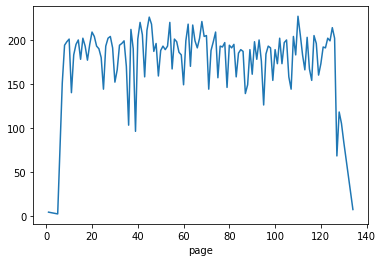

In [14]:
vol.line_counts().plot()

### Exercise: 

Take a look at some other records and get a sense of how text is extracted
* how complete is it?
* what do you gain from relying exclusively on word count? what do you lose?
* is there clutter? Are non-alphanumeric characters useful to you?
* how could it help to know the position or part of speech of a token? 
* how could varying transcription thoroughness and accuracy influence your research?

http://htrc.github.io/htrc-feature-reader/htrc_features/feature_reader.m.html#htrc_features.feature_reader.Volume.tokenlist

In [15]:
pandas.set_option('display.max_rows', None)
vol.tokenlist(drop_section=False,case=False, pos=False)[1000:1010]

count
page section lowercase           
9    body    consisting         1
             consultant         1
             consultation       1
             continually        1
             continue           3
             contributions      1
             council            1
             counsel            1
             county             2
             courage            1

In [16]:
tl = vol.tokenlist()

In [17]:
### Select counts of the word ‘academic’ for all pages and all page sections (first 10 results)
tl.loc[(slice(None), slice(None), "academic"),][:10]

,,,,count
page,section,token,pos,
8,body,academic,JJ,3
10,body,academic,JJ,1
12,body,academic,JJ,1
13,body,academic,JJ,1
15,body,academic,JJ,2
16,body,academic,JJ,1
19,body,academic,JJ,1
21,body,academic,JJ,1
22,body,academic,JJ,1


### Exercise:

Try to find the word “nursing” in this record, and compare where that shows up to the token-per-page pattern previously plotted.

In [18]:
tl_nursing = vol.tokenlist()
nursing_pages = tl_nursing.loc[(slice(None), slice(None), "nursing"),]
nursing_pages

,,,,count
page,section,token,pos,
21,body,nursing,NN,1
25,body,nursing,NN,1
84,body,nursing,NN,1
86,body,nursing,NN,1
100,body,nursing,NN,1
120,body,nursing,NN,1
124,body,nursing,NN,5
125,body,nursing,NN,1


### Counting and sorting

For the next exercise, we'll limit our analysis to one page. 

In [19]:
# displaying first 10
vol.tokenlist(page_select=8,case=False).sort_values('count', ascending=False)[:10]

count
page section lowercase pos       
8    body    the       DT      63
             ,         ,       62
             of        IN      44
             .         .       39
             to        TO      30
             and       CC      25
             in        IN      18
             be        VB      17
             will      MD      17
             a         DT      16

### Filtering based on token count

Use the "boolean mask" technique

In [20]:
tl_page = vol.tokenlist(page_select=8,case=False)
pandas.set_option('display.max_rows', None)
tl_page[tl_page['count'] > 20]

count
page section lowercase pos       
8    body    ,         ,       62
             .         .       39
             and       CC      25
             of        IN      44
             the       DT      63
             to        TO      30

In [21]:
# alternatively, you can order them and print the first n results
tl_page.sort_values('count', ascending=False)[:10]

count
page section lowercase pos       
8    body    the       DT      63
             ,         ,       62
             of        IN      44
             .         .       39
             to        TO      30
             and       CC      25
             in        IN      18
             be        VB      17
             will      MD      17
             a         DT      16

### Something to Consider

The most common words, by count, are "stop words", common words that might not be useful in an analysis.
In the next section, where we consider a collection of documents, we'll review a technique to remove stop words prior to analysis. 

### Working with granular, row-by-row data

At some point, you may want to write your own code to work on a granular level with the contents of a record, rather than relying on dataframe operations. 

In [22]:
# break to print only the first pate

for page in vol.pages():
    print('page:', page)
    
    page_df = page.tokenlist()

    for i, r in page_df.iterrows():
        print('i:', i)
        print('r:', r)
        print()
    break


page: <page 1 of volume uc1.32106020265887>
i: (1, 'body', '-', 'UNK')
r: count    1
Name: (1, body, -, UNK), dtype: uint32

i: (1, 'body', '020265887', 'UNK')
r: count    1
Name: (1, body, 020265887, UNK), dtype: uint32

i: (1, 'body', '3.2106', 'UNK')
r: count    1
Name: (1, body, 3.2106, UNK), dtype: uint32

i: (1, 'body', 'universit-of-ca-For-Santa-cau', 'UNK')
r: count    1
Name: (1, body, universit-of-ca-For-Santa-cau, UNK), dtype: uint32

i: (1, 'body', '|||||||', 'UNK')
r: count    1
Name: (1, body, |||||||, UNK), dtype: uint32

